In [102]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.stats import entropy


Modified image saved to Modified_Woman3.tiff


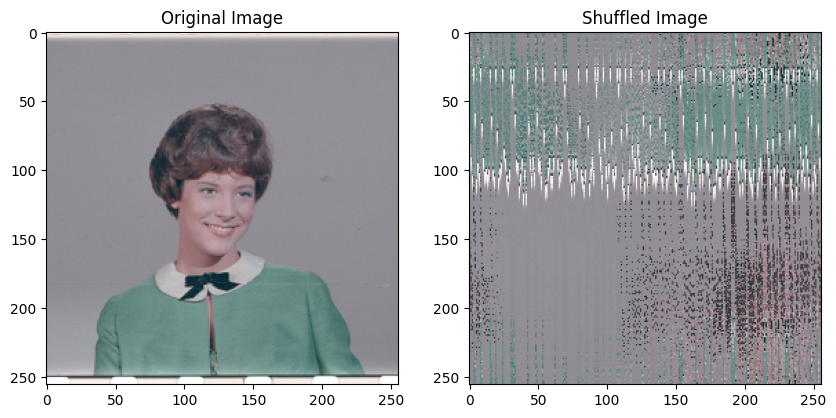

In [113]:
# Load the image
image_path = "12 Woman3.tiff"
output_path = "Modified_Woman3.tiff"

image = Image.open(image_path)
image_array = np.array(image)

# Example sequence of numbers (ASCII values converted)
sequence = [
    87, 97, 110, 32, 65, 113, 101, 108, 32, 72, 97, 107, 105, 109, 105, 32, 66, 105, 110, 32, 
    77, 111, 104, 100, 32, 90, 97, 109, 114, 105, 32, 43, 32, 65, 98, 100, 117, 108, 97, 122, 
    105, 122, 32, 71, 97, 109, 97, 108, 32, 65, 98, 100, 111, 32, 77, 117, 116, 104, 97, 110, 
    110, 97, 32, 72, 97, 109, 105, 100, 32, 43, 32, 77, 97, 105, 115, 97, 114, 97, 104, 32, 66, 
    105, 110, 116, 105, 32, 73, 115, 104, 97, 107, 32, 43, 32, 84, 97, 110, 32, 83, 104, 117, 
    101, 32, 78, 105, 110, 103, 32, 43, 32, 76, 111, 119, 32, 72, 117, 105, 32, 88, 105, 97, 110
]

# Function to perform rotating shift on rows and columns
def rotate_shift(image_array, sequence):
    # Calculate shift amounts based on sequence length
    shift_rows = len(sequence) // image_array.shape[1]
    shift_cols = len(sequence) // image_array.shape[0]

    # Shift rows
    for i in range(image_array.shape[0]):
        shift_amount = sequence[i % len(sequence)]
        image_array[i] = np.roll(image_array[i], shift_amount, axis=0)

    # Shift columns
    for j in range(image_array.shape[1]):
        shift_amount = sequence[j % len(sequence)]
        image_array[:, j] = np.roll(image_array[:, j], shift_amount, axis=0)

    return image_array

# Apply rotating shift
modified_image_array = rotate_shift(image_array, sequence)

# Convert array back to image and save
modified_image = Image.fromarray(modified_image_array)
modified_image.save(output_path)

print(f"Modified image saved to {output_path}")

# Display the original and shuffled images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Shuffled Image")
plt.imshow(modified_image)

plt.show()


In [104]:
# Step 4: Create Lookup Table (LT1)
s_box = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
]

lt1 = s_box


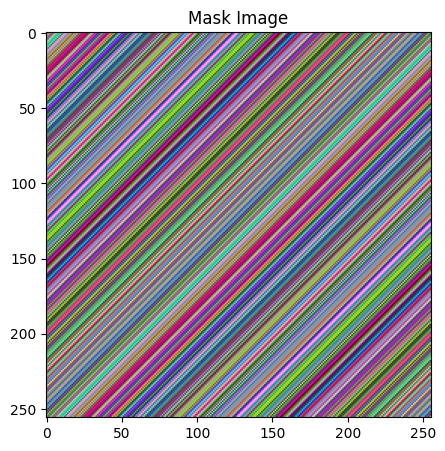

In [119]:
# Step 5: Create Mask Image (MI)
mask_image = np.zeros_like(modified_image_array)

for i in range(modified_image_array.shape[0]):
    for j in range(modified_image_array.shape[1]):
        for k in range(modified_image_array.shape[2]):  # Assuming RGB image
            N = ((i + j) * (k + 1)) % 256
            M = lt1[N]
            mask_image[i, j, k] = M

# Convert array back to image and save
mask_image_pil = Image.fromarray(mask_image)
mask_image_pil.save("mask_image.tiff")

# Display the mask image
plt.figure(figsize=(5, 5))
plt.title("Mask Image")
plt.imshow(mask_image)
plt.show()




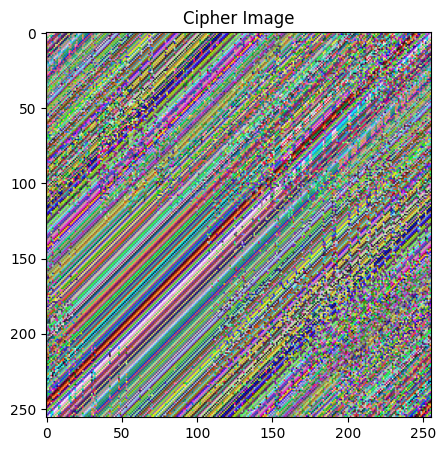

In [121]:
# Step 6: Cipher Image (CI) Calculation
cipher_image = np.bitwise_xor(modified_image_array, mask_image)

# Convert array back to image and save
cipher_image_pil = Image.fromarray(cipher_image)
cipher_image_pil.save("cipher_image.tiff")

# Display the cipher image
plt.figure(figsize=(5, 5))
plt.title("Cipher Image")
plt.imshow(cipher_image)
plt.show()




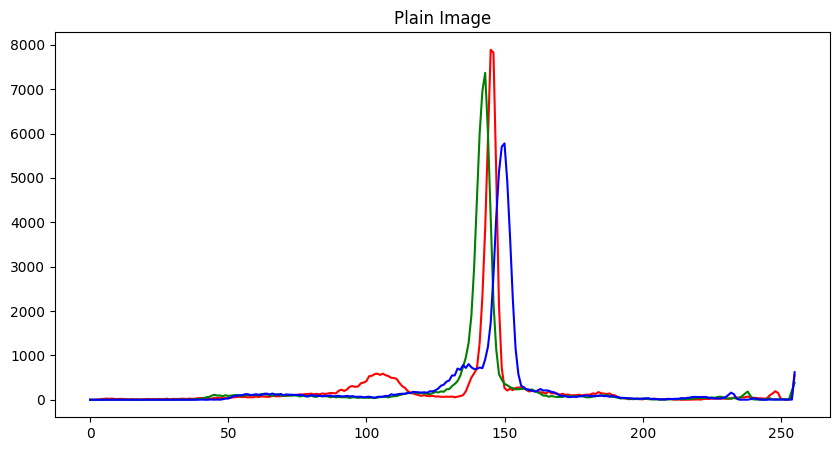

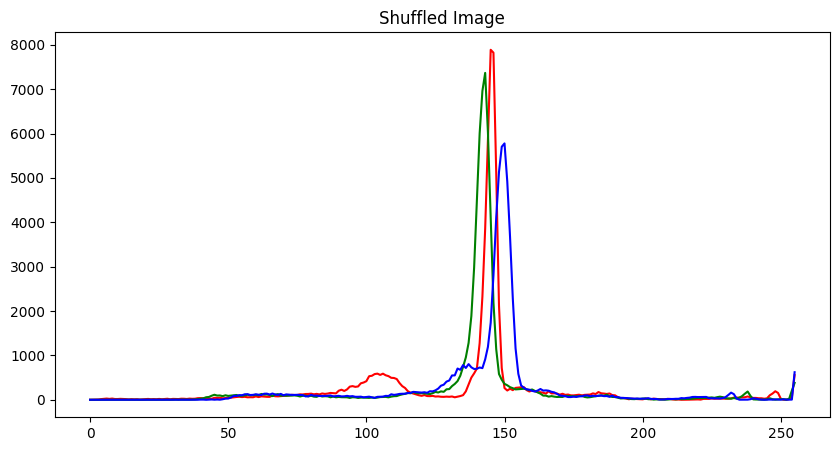

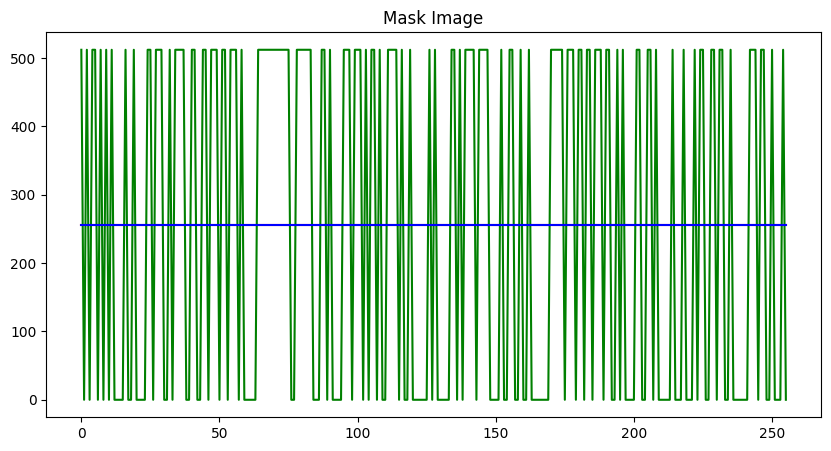

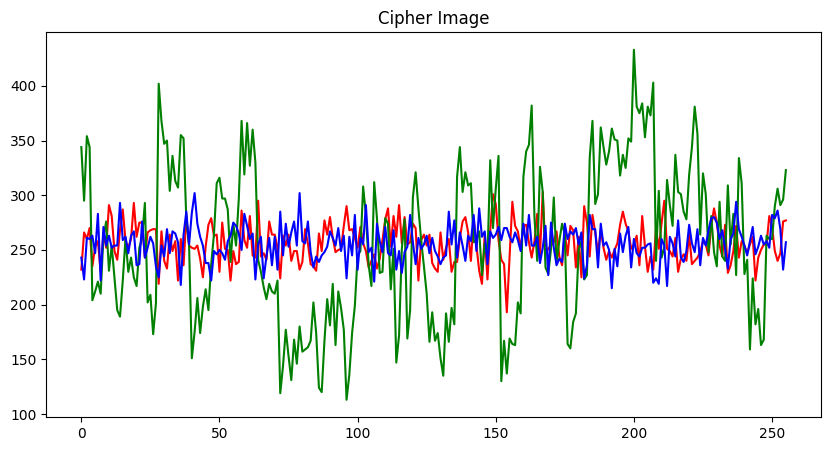

In [124]:
# Function to plot histograms of RGB planes
def plot_histograms(image, title):
    colors = ('r', 'g', 'b')
    plt.figure(figsize=(10, 5))
    for i, color in enumerate(colors):
        hist, bins = np.histogram(image[..., i], bins=256, range=(0, 256))
        plt.plot(hist, color=color)
    plt.title(title)
    plt.show()

# Plot histograms
plot_histograms(image_array, "Plain Image")
plot_histograms(modified_image_array, "Shuffled Image")
plot_histograms(mask_image, "Mask Image")
plot_histograms(cipher_image, "Cipher Image")



In [127]:
# Function to calculate information entropy
def calculate_entropy(image):
    hist, _ = np.histogram(image, bins=256, range=(0, 256))
    hist = hist / hist.sum()
    return entropy(hist, base=2)

# Calculate and print entropy
print("Plain Image Entropy:", calculate_entropy(image_array))
print("Shuffled Image Entropy:", calculate_entropy(modified_image_array))
print("Mask Image Entropy:", calculate_entropy(mask_image))
print("Cipher Image Entropy:", calculate_entropy(cipher_image))



Plain Image Entropy: 5.970915750635078
Shuffled Image Entropy: 5.970915750635078
Mask Image Entropy: 7.918295834054491
Cipher Image Entropy: 7.99368408399579
